<a href="https://colab.research.google.com/github/machiwao/pjdsc-optima-prime-sakayan-express/blob/main/SakayanExpress_DemandMapping_unstable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakayan Express - Demand Mapping
Map passenger demand on a respective location. Predict number of passengers at a given time

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

## Possible Mapping Sources

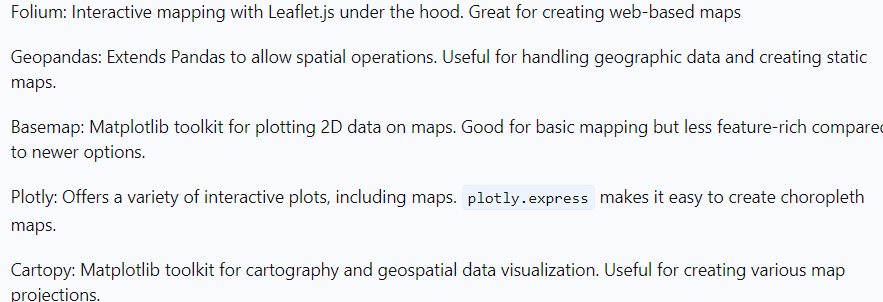

## Dataset Loading

In [10]:
# Raw Data
Belga_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_BELGA_withFuelData.csv"
Deocareza_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_DEOCAREZA_withFuelData.csv"
Graceda_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_GRACEDA_withFuelData.csv"
Manuel_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_MANUEL_withFuelData.csv"
Paralde_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_PARALDE_withFuelData.csv"

Carmelotes_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_CARMELOTES_withFuelData.csv"
Escuerdo_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_ESCUERDO_withFuelData.csv"
Graceda_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_GRACEDA_withFuelData.csv"
Neri_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_NERI_withFuelData.csv"
Ostan_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_OSTAN_withFuelData.csv"

Bajaro_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_BAJARO.csv"
Escuerdo_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_ESCUERDO_withFuelData.csv"
Graceda_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_GRACEDA_withFuelData.csv"
Neri_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_NERI_withFuelData.csv"
Ostan_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_OSTAN_withFuelData.csv"

Belga_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_BELGA_withFuelData.csv"
Caralde_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_CARALDE_withFuelData.csv"

Arangco_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_ARANGCO.csv"
Ceballos_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_CEBALLOS.csv"
Delosreyes_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_DELOSREYES.csv"
Fontillas_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_FONTILLAS_withFuelData.csv"
Lina_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_LINA.csv"
Neri_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_NERI_withFuelData.csv"

Arango_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_ARANGO.csv"
Bolata_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_BOLATA.csv"
Gipa_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_GIPA.csv"
Loy_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_LOY.csv"
Porquez_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_PORQUEZ.csv"

Arango_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_ARANGO.csv"
Gipa_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_GIPA.csv"
Ubusan_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_UBUSAN.csv"

Delos_Reyes_0728_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0728_Delos_Reyes.csv"

In [11]:
# Cleaned Data
arango_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/arangco_0718.csv"
arango_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/arango_0719.csv"
arango_0721 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/arango_0721.csv"
bajaro_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/bajaro_0713.csv"
belga_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/belga_0711.csv"
belga_0717 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/belga_0717.csv"
bolata_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/bolata_0719.csv"
caralde_0717 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/caralde_0717.csv"
carmelotes_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/carmelotes_0712.csv"
ceballos_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ceballos_0718.csv"
delosreyes_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/delosreyes_0718.csv"
deocareza_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/deocareza_0711.csv"
escuerdos_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/escuerdos_0712.csv"
escuerdos_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/escuerdos_0713.csv"
fontillas_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/fontillas_0718.csv"
gipa_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/gipa_0719.csv"
gipa_0721 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/gipa_0721.csv"
graceda_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/graceda_0711.csv"
graceda_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/graceda_0712.csv"
graceda_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/graceda_0713.csv"
lina_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/lina_0718.csv"
loy_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/loy_0719.csv"
manuel_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/manuel_0711.csv"
neri_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/neri_0712.csv"
neri_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/neri_0713.csv"
neri_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/neri_0718.csv"
ostan_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ostan_0712.csv"
ostan_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ostan_0713.csv"
paralde_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/paralde_0711.csv"
porquez_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/porquez_0719.csv"
ubusan_0721 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ubusan_0721.csv"

In [12]:
df_1_0711 = pd.read_csv(belga_0711)
df_1_0711['bus_dispatched'] = 3;
df_1_0711['bus_driver'] = 3

df_2_0711 = pd.read_csv(deocareza_0711)
df_2_0711['bus_dispatched'] = 1
df_2_0711['bus_driver'] = 1

df_3_0711 = pd.read_csv(graceda_0711)
df_3_0711['bus_dispatched'] = 2;
df_3_0711['bus_driver'] = 2

df_4_0711 = pd.read_csv(manuel_0711)
df_4_0711['bus_dispatched'] = 4;
df_4_0711['bus_driver'] = 4

df_5_0711 = pd.read_csv(paralde_0711)
df_5_0711['bus_dispatched'] = 5;
df_5_0711['bus_driver'] = 5

df_0711 = pd.concat([df_1_0711, df_2_0711, df_3_0711, df_4_0711, df_5_0711],
                    ignore_index=True)

In [13]:
df_1_0712 = pd.read_csv(graceda_0712)
df_1_0712['bus_dispatched'] = 6;
df_1_0712['bus_driver'] = 2;

df_2_0712 = pd.read_csv(neri_0712)
df_2_0712['bus_dispatched'] =10;
df_2_0712['bus_driver'] = 9;

df_3_0712 = pd.read_csv(ostan_0712)
df_3_0712['bus_dispatched'] = 8;
df_3_0712['bus_driver'] = 7;

df_4_0712 = pd.read_csv(carmelotes_0712)
df_4_0712['bus_dispatched'] = 9;
df_4_0712['bus_driver'] = 8;

df_5_0712 = pd.read_csv(escuerdos_0712)
df_5_0712['bus_dispatched'] = 7;
df_5_0712['bus_driver'] = 6;

df_0712 = pd.concat([df_1_0712, df_2_0712, df_3_0712, df_4_0712, df_5_0712],
                    ignore_index=True)

In [14]:
df_1_0713 = pd.read_csv(escuerdos_0713)
df_1_0713['bus_dispatched'] = 14;
df_1_0713['bus_driver'] = 6;

df_2_0713 = pd.read_csv(neri_0713)
df_2_0713['bus_dispatched'] =13;
df_2_0713['bus_driver'] = 9;

df_3_0713 = pd.read_csv(ostan_0713)
df_3_0713['bus_dispatched'] = 12;
df_3_0713['bus_driver'] = 7;

df_4_0713 = pd.read_csv(graceda_0713)
df_4_0713['bus_dispatched'] = 11;
df_4_0713['bus_driver'] = 2;

df_5_0713 = pd.read_csv(bajaro_0713)
df_5_0713['bus_dispatched'] = 15;
df_5_0713['bus_driver'] = 10;

df_0713 = pd.concat([df_1_0713, df_2_0713, df_3_0713, df_4_0713, df_5_0713],
               ignore_index=True)

In [15]:
df_1_0717 = pd.read_csv(belga_0717)
df_1_0717['bus_dispatched'] = 17;
df_1_0717['bus_driver'] = 3;

df_2_0717 = pd.read_csv(caralde_0717)
df_2_0717['bus_dispatched'] =16;
df_2_0717['bus_driver'] = 11;

df_0717 = pd.concat([df_1_0717, df_2_0717], ignore_index=True)

In [16]:
df_1_0718 = pd.read_csv(arango_0718)
df_1_0718['bus_dispatched'] = 23;
df_1_0718['bus_driver'] = 16;

df_2_0718 = pd.read_csv(neri_0718)
df_2_0718['bus_dispatched'] =18;
df_2_0718['bus_driver'] = 9;

df_3_0718 = pd.read_csv(lina_0718)
df_3_0718['bus_dispatched'] = 20;
df_3_0718['bus_driver'] = 13;

df_4_0718 = pd.read_csv(fontillas_0718)
df_4_0718['bus_dispatched'] = 19;
df_4_0718['bus_driver'] = 12;

df_5_0718 = pd.read_csv(delosreyes_0718)
df_5_0718['bus_dispatched'] = 21;
df_5_0718['bus_driver'] = 14;

df_6_0718 = pd.read_csv(ceballos_0718)
df_6_0718['bus_dispatched'] = 22;
df_6_0718['bus_driver'] = 15;

df_0718 = pd.concat([df_1_0718, df_2_0718, df_3_0718, df_4_0718, df_5_0718,
                df_6_0718], ignore_index=True)

In [17]:
df_1_0719 = pd.read_csv(arango_0719)
df_1_0719['bus_dispatched'] = 27;
df_1_0719['bus_driver'] = 16;

df_2_0719 = pd.read_csv(bolata_0719)
df_2_0719['bus_dispatched'] =28;
df_2_0719['bus_driver'] = 20;

df_3_0719 = pd.read_csv(gipa_0719)
df_3_0719['bus_dispatched'] = 25;
df_3_0719['bus_driver'] = 18;

df_4_0719 = pd.read_csv(loy_0719)
df_4_0719['bus_dispatched'] = 26;
df_4_0719['bus_driver'] = 19;

df_5_0719 = pd.read_csv(porquez_0719)
df_5_0719['bus_dispatched'] = 24;
df_5_0719['bus_driver'] = 17;

df_0719 = pd.concat([df_1_0719, df_2_0719, df_3_0719, df_4_0719, df_5_0719],
                    ignore_index=True)

In [18]:
df_1_0721 = pd.read_csv(arango_0721)
df_1_0721['bus_dispatched'] = 31;
df_1_0721['bus_driver'] = 16;

df_2_0721 = pd.read_csv(gipa_0721)
df_2_0721['bus_dispatched'] =29;
df_2_0721['bus_driver'] = 18;

df_3_0721 = pd.read_csv(ubusan_0721)
df_3_0721['bus_dispatched'] =30;
df_3_0721['bus_driver'] = 21;

df_0721 = pd.concat([df_1_0721, df_2_0721, df_3_0721], ignore_index=True)

In [19]:
df = pd.concat([df_0711, df_0712, df_0713, df_0717, df_0718, df_0719, df_0721],
               ignore_index=True)

In [20]:
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,...,direction,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,bus_dispatched,bus_driver,accelY...21,DRIVER,driver,waiting_passengers
929173,121.030402,14.654660,2023-07-18 10:42:07,0,0,6.0,10.0,42.0,7.0,1,...,Southbound,7,NaN,NaN,21,14,NaN,NaN,NaN,0.0
42095,120.989413,14.532443,2023-07-11 15:48:06,0,0,2.0,15.0,48.0,6.0,1,...,Southbound,8,0.0,0.0,3,3,NaN,NaN,NaN,NaN
1322810,121.011853,14.657620,2023-07-21 18:39:39,0,0,42.0,18.0,39.0,39.0,4,...,Northbound,6,NaN,NaN,29,18,NaN,NaN,NaN,0.0
776515,121.028973,14.550253,2023-07-18 05:20:29,0,0,41.0,5.0,20.0,29.0,1,...,Northbound,0,NaN,NaN,18,9,NaN,NaN,NaN,0.0
384440,121.050398,14.620627,2023-07-12 09:17:21,0,0,22.0,9.0,17.0,21.0,2,...,Northbound,3,NaN,NaN,7,6,NaN,NaN,NaN,0.0
213669,121.045060,14.565387,2023-07-11 11:16:22,0,0,27.0,11.0,16.0,22.0,1,...,Southbound,3,0.0,0.0,5,5,NaN,NaN,NaN,NaN
992982,121.059712,14.598458,2023-07-18 16:06:48,0,0,20.0,16.0,6.0,48.0,1,...,Southbound,1,NaN,NaN,22,15,NaN,NaN,NaN,0.0
745098,121.046983,14.628318,2023-07-18 15:00:15,0,0,11.0,15.0,0.0,15.0,1,...,Southbound,0,NaN,NaN,23,16,NaN,NaN,NaN,0.0
1277957,121.051937,14.578683,2023-07-21 23:20:16,0,0,40.0,23.0,20.0,16.0,4,...,Northbound,0,NaN,NaN,31,16,NaN,NaN,NaN,0.0
1261340,121.034593,14.554508,2023-07-21 18:15:54,0,0,32.0,18.0,15.0,54.0,4,...,Northbound,3,NaN,NaN,31,16,NaN,NaN,NaN,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374479 entries, 0 to 1374478
Data columns (total 25 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   longitude                      1374479 non-null  float64
 1   latitude                       1374479 non-null  float64
 2   timestamp                      1374479 non-null  object 
 3   Board                          1374479 non-null  int64  
 4   Alight                         1374479 non-null  int64  
 5   Numpass                        1374479 non-null  float64
 6   Hour                           1374479 non-null  float64
 7   Min                            1374479 non-null  float64
 8   Sec                            1374479 non-null  float64
 9   Day_of_week                    1374479 non-null  int64  
 10  stop_cluster                   1374479 non-null  int64  
 11  distance_from_cluster_0        1374479 non-null  float64
 12  distance_from_

In [22]:
df.describe()

,longitude,latitude,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,...,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,QuarterHour,northbound_waiting_passengers,southbound_waiting_passengers,bus_dispatched,bus_driver,accelY...21,waiting_passengers
count,1.374479e+06,1.374479e+06,1.374479e+06,1.374479e+06,1.374479e+06,1.374479e+06,1.374479e+06,1.374479e+06,1.374479e+06,1.374479e+06,...,1.374479e+06,1.374448e+06,1.374448e+06,1.374479e+06,230426.000000,230426.000000,1.374479e+06,1.374479e+06,61611.000000,1.144053e+06
mean,1.210164e+02,1.458254e+01,1.202710e-02,1.261060e-02,2.342261e+01,1.317312e+01,2.945211e+01,2.948634e+01,1.879884e+00,9.221755e+00,...,8.793703e+00,-1.101246e-05,3.787546e-05,4.568506e+00,0.059859,0.041224,1.606601e+01,1.009295e+01,30.736346,9.058933e-02
std,2.480509e-02,5.413315e-02,1.090067e-01,1.115866e-01,1.622190e+01,5.064981e+00,1.725546e+01,1.730206e+01,1.118137e+00,5.879407e+00,...,6.115880e+00,4.098702e-01,5.031941e-01,3.320567e+00,0.660993,0.654215,9.194897e+00,6.098520e+00,57.791832,9.800164e-01
min,1.209834e+02,1.450272e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.184367e-03,-1.652432e+01,-1.652018e+01,0.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00,-338.000000,0.000000e+00
25%,1.209914e+02,1.453725e+01,0.000000e+00,0.000000e+00,1.300000e+01,9.000000e+00,1.500000e+01,1.400000e+01,1.000000e+00,4.000000e+00,...,2.958139e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,8.000000e+00,5.000000e+00,5.000000,0.000000e+00
50%,1.210119e+02,1.456513e+01,0.000000e+00,0.000000e+00,2.100000e+01,1.300000e+01,2.900000e+01,3.000000e+01,2.000000e+00,9.000000e+00,...,8.417759e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000,0.000000,1.600000e+01,9.000000e+00,15.000000,0.000000e+00
75%,1.210392e+02,1.464474e+01,0.000000e+00,0.000000e+00,3.200000e+01,1.700000e+01,4.400000e+01,4.400000e+01,3.000000e+00,1.400000e+01,...,1.571583e+01,0.000000e+00,0.000000e+00,7.000000e+00,0.000000,0.000000,2.500000e+01,1.600000e+01,37.000000,0.000000e+00
max,1.210608e+02,1.473059e+01,1.000000e+00,1.000000e+00,1.240000e+02,2.300000e+01,5.900000e+01,5.900000e+01,5.000000e+00,2.000000e+01,...,2.513408e+01,1.661382e+01,1.661288e+01,1.000000e+01,12.000000,16.000000,3.100000e+01,2.100000e+01,866.000000,3.000000e+01


In [24]:
df.isnull().sum()

,0
longitude,0
latitude,0
timestamp,0
Board,0
Alight,0
Numpass,0
Hour,0
Min,0
Sec,0
Day_of_week,0


In [25]:
df.duplicated().sum()

1154

## Data Cleaning Pipeline

### Commuter Demand Data
Time-based Features: Hour, Min, Sec, Timestamp, Date, Day of the week

Location-based Features: Longitude, latitude

Passenger data: Board, Alight, Numpass

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374479 entries, 0 to 1374478
Data columns (total 25 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   longitude                      1374479 non-null  float64
 1   latitude                       1374479 non-null  float64
 2   timestamp                      1374479 non-null  object 
 3   Board                          1374479 non-null  int64  
 4   Alight                         1374479 non-null  int64  
 5   Numpass                        1374479 non-null  float64
 6   Hour                           1374479 non-null  float64
 7   Min                            1374479 non-null  float64
 8   Sec                            1374479 non-null  float64
 9   Day_of_week                    1374479 non-null  int64  
 10  stop_cluster                   1374479 non-null  int64  
 11  distance_from_cluster_0        1374479 non-null  float64
 12  distance_from_

In [27]:
cols = ['longitude','latitude','timestamp','Board','Alight','Numpass','Hour','Min','Sec', 'bus_dispatched',
        'bus_driver']
# cols = ['longitude','latitude','timestamp','Board','Alight','Numpass','Hour','Min','Sec']

In [29]:
df = df[cols]

In [30]:
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,bus_dispatched,bus_driver
345205,121.056158,14.586537,2023-07-12 16:37:04,0,0,23.0,16.0,37.0,4.0,9,8
1156603,120.991095,14.521478,2023-07-19 07:43:30,0,0,22.0,7.0,43.0,30.0,26,19
230528,120.992032,14.517412,2023-07-12 04:09:38,0,0,12.0,4.0,9.0,38.0,6,2
70047,121.030842,14.551760,2023-07-11 06:33:07,0,0,28.0,6.0,33.0,7.0,1,1
542818,120.986292,14.657240,2023-07-13 20:40:53,0,0,0.0,20.0,40.0,53.0,12,7
78123,121.025713,14.656742,2023-07-11 08:43:51,0,0,36.0,8.0,43.0,51.0,1,1
1133025,121.035813,14.555542,2023-07-19 12:22:07,0,0,12.0,12.0,22.0,7.0,25,18
854836,120.999625,14.537488,2023-07-18 13:02:12,0,0,19.0,13.0,2.0,12.0,20,13
1310504,121.032757,14.651007,2023-07-21 14:35:43,1,0,20.0,14.0,35.0,43.0,29,18
791833,121.033383,14.650863,2023-07-18 09:29:33,0,0,11.0,9.0,29.0,33.0,18,9


In [31]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed', errors='coerce')
df['Hour'] = df['timestamp'].dt.hour
df['Min'] = df['timestamp'].dt.minute
df['Sec'] = df['timestamp'].dt.second
df['Time'] = df['timestamp'].dt.time
df['datePH'] = df['timestamp'].dt.date
df['Day_of_week'] = df['timestamp'].dt.dayofweek

In [32]:
df['Board'].ffill(inplace = True)
df['Alight'].ffill(inplace = True)
df['Numpass'].ffill(inplace = True)

In [33]:
df.isna().sum()

,0
longitude,0
latitude,0
timestamp,0
Board,0
Alight,0
Numpass,0
Hour,0
Min,0
Sec,0
bus_dispatched,0


In [34]:
df.duplicated().sum()

2381

In [35]:
df.dropna(inplace = True)

In [36]:
df.drop_duplicates(inplace = True)

In [37]:
# Specific Bus Stops
Monumento = (14.658796024391433, 120.98613030490293)
Bagong_Barrio = (14.658962098122908, 120.99840409277799)
Balintawak = (14.65720874, 120.9875170)
Kaingin = (14.659207715596748, 121.01043239008315)
Roosevelt = (14.65946031850859, 121.01960427287607)
North_Avenue = (14.65718384651016, 121.03239793536257)
Quezon_Avenue = (14.656139926966889, 121.03605665566357)
Mega_Q_Mart = (14.63431675877849, 121.04705854853009)
Main_Avenue = (14.615051484903669, 121.05341714648678)
Santolan = (14.609827993592939, 121.05501086998106)
Ortigas = (14.589274921830608, 121.05698223579455)
Guadalupe = (14.567240858915584, 121.04520617378073)
Buendia = (14.557616094605738, 121.03343011212988)
Ayala = (14.563354406583553, 121.02589656273899)
One_Ayala_Terminal = (14.55058860630776, 121.02789561089271)
Tramo = (14.540645092074023, 121.00359742139625)
Taft_Avenue = (14.538392473279682, 120.99945327510484)
Roxas_Boulevard = (14.538057498309131, 120.99218611080356)
MOA = (14.53684543526199, 120.98357811498406)
Macapagal_Bradco_Avenue = (14.538057498309131, 120.99160935176819)
City_of_Dreams = (14.524975658136254, 120.99059974706373)
Ayala_Malls_Manila_Bay = (14.523068542733853, 120.99008185576514)
PITX_Terminal = (14.510338360322828, 120.99126572649949)


In [ ]:
from sklearn.cluster import KMeans

# Use K-Means clustering to find clusters of stops with potentially similar waiting patterns
kmeans = KMeans(n_clusters=21, random_state=42)  # Choose a reasonable number of clusters
df['stop_cluster'] = kmeans.fit_predict(df[['longitude', 'latitude']])

In [ ]:
df[df['Board']==True]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Time,datePH,Day_of_week,stop_cluster
521,120.988867,14.657150,2023-07-21 06:21:26,1,0,1.0,6,21,26,06:21:26,2023-07-21,4,3
523,120.989030,14.657155,2023-07-21 06:21:27,1,0,2.0,6,21,27,06:21:27,2023-07-21,4,3
525,120.989030,14.657155,2023-07-21 06:21:28,1,0,4.0,6,21,28,06:21:28,2023-07-21,4,3
527,120.989197,14.657165,2023-07-21 06:21:29,1,0,6.0,6,21,29,06:21:29,2023-07-21,4,3
529,120.989197,14.657165,2023-07-21 06:21:30,1,0,7.0,6,21,30,06:21:30,2023-07-21,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153449,121.020132,14.657702,2023-07-21 18:23:32,1,0,51.0,18,23,32,18:23:32,2023-07-21,4,19
153451,121.020132,14.657702,2023-07-21 18:23:33,1,0,52.0,18,23,33,18:23:33,2023-07-21,4,19
153452,121.020132,14.657702,2023-07-21 18:23:34,1,0,53.0,18,23,34,18:23:34,2023-07-21,4,19
153456,121.020132,14.657702,2023-07-21 18:23:37,1,0,54.0,18,23,37,18:23:37,2023-07-21,4,19


In [ ]:
df['Board'] = df['Board'].astype(int)
df['Alight'] = df['Alight'].astype(int)

In [ ]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth
    (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = [np.radians(coord) for coord in [lat1, lon1, lat2, lon2]]

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r


In [ ]:
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

Cluster 0: [121.05542081  14.58489448]
Cluster 1: [120.98917894  14.53584359]
Cluster 2: [121.03252372  14.65164499]
Cluster 3: [120.98684018  14.65718445]
Cluster 4: [121.02861582  14.54985674]
Cluster 5: [120.99096949  14.51070305]
Cluster 6: [121.05388434  14.61339322]
Cluster 7: [121.04574772  14.5674697 ]
Cluster 8: [121.03944516  14.64117809]
Cluster 9: [121.00737671  14.53843692]
Cluster 10: [121.0123689   14.65753196]
Cluster 11: [121.04693694  14.62835749]
Cluster 12: [120.99693227  14.65728341]
Cluster 13: [121.05881718  14.59944138]
Cluster 14: [120.98992301  14.52867129]
Cluster 15: [121.01848391  14.54167028]
Cluster 16: [120.99889624  14.53761679]
Cluster 17: [121.03608684  14.55589659]
Cluster 18: [121.00484535  14.65741626]
Cluster 19: [121.02120201  14.65737053]
Cluster 20: [120.99067123  14.52057443]


In [ ]:
df['Day_of_week'] = df['timestamp'].dt.weekday

In [ ]:
df.head()

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster
0,120.986170,14.657398,2023-07-21 06:11:52,0,0,0.0,6,11,52,4,3
1,120.986170,14.657398,2023-07-21 06:11:53,0,0,0.0,6,11,53,4,3
2,120.986057,14.657368,2023-07-21 06:11:54,0,0,0.0,6,11,54,4,3
3,120.986057,14.657368,2023-07-21 06:11:55,0,0,0.0,6,11,55,4,3
4,120.986027,14.657357,2023-07-21 06:11:56,0,0,0.0,6,11,56,4,3


In [ ]:
# Define the coordinates for the end clusters (example values)
northmost_coords = (14.65720874, 120.98751702)  # Example coordinates for cluster 0 (northmost terminal)
southmost_coords = (14.51075543, 120.99064908)  # Example coordinates for cluster 18 (southmost terminal)

def calculate_distance_from_terminals(df):
    """
    Calculates the distance of each bus stop from the two end terminals (cluster 0 and cluster 18).
    Adds columns for distance_from_cluster_0 and distance_from_cluster_18.

    Args:
    - df: DataFrame with latitude and longitude columns

    Returns:
    - DataFrame with added 'distance_from_cluster_0' and 'distance_from_cluster_18' columns
    """
    # Calculate distances from cluster 0 (northmost terminal)
    df['distance_from_cluster_0'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], northmost_coords[0], northmost_coords[1]), axis=1)

    # Calculate distances from cluster 18 (southmost terminal)
    df['distance_from_cluster_18'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], southmost_coords[0], southmost_coords[1]), axis=1)

    return df

In [ ]:
df = calculate_distance_from_terminals(df)

In [ ]:
def determine_direction_based_on_terminals(df):
    """
    Determines the bus direction (Northbound or Southbound) based on the proximity
    of the bus to the end terminals (clusters 0 and 18). If the bus is moving closer to
    cluster 0, it's Northbound; if it's moving closer to cluster 18, it's Southbound.

    Args:
    - df: DataFrame that contains 'distance_from_cluster_0' and 'distance_from_cluster_18' columns

    Returns:
    - DataFrame with a 'direction' column
    """
    # Calculate the difference in distance between consecutive rows to determine direction
    df['dist_change_cluster_0'] = df['distance_from_cluster_0'].diff()
    df['dist_change_cluster_18'] = df['distance_from_cluster_18'].diff()

    # Determine direction based on the distance change
    df['direction'] = df.apply(lambda row: 'Northbound' if row['dist_change_cluster_0'] < 0 else 'Southbound' if row['dist_change_cluster_18'] < 0 else None, axis=1)

    # Forward fill to propagate the last known direction when stationary
    df['direction'] = df['direction'].ffill()
    df['direction'] = df['direction'].bfill()

    return df

In [ ]:
df = determine_direction_based_on_terminals(df)
df

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction
0,120.986170,14.657398,2023-07-21 06:11:52,0,0,0.0,6,11,52,4,3,0.146432,16.313066,NaN,NaN,Southbound
1,120.986170,14.657398,2023-07-21 06:11:53,0,0,0.0,6,11,53,4,3,0.146432,16.313066,0.000000,0.000000,Southbound
2,120.986057,14.657368,2023-07-21 06:11:54,0,0,0.0,6,11,54,4,3,0.158105,16.310096,0.011673,-0.002969,Southbound
3,120.986057,14.657368,2023-07-21 06:11:55,0,0,0.0,6,11,55,4,3,0.158105,16.310096,0.000000,0.000000,Southbound
4,120.986027,14.657357,2023-07-21 06:11:56,0,0,0.0,6,11,56,4,3,0.161175,16.308894,0.003069,-0.001202,Southbound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153967,120.986592,14.657210,2023-07-21 18:33:39,0,0,0.0,18,33,39,4,3,0.099553,16.290858,0.000000,0.000000,Southbound
153968,120.986592,14.657210,2023-07-21 18:33:40,0,0,0.0,18,33,40,4,3,0.099553,16.290858,0.000000,0.000000,Southbound
153969,120.986592,14.657210,2023-07-21 18:33:41,0,0,0.0,18,33,41,4,3,0.099553,16.290858,0.000000,0.000000,Southbound
153970,120.986592,14.657210,2023-07-21 18:33:42,0,0,0.0,18,33,42,4,3,0.099553,16.290858,0.000000,0.000000,Southbound


In [ ]:
def assign_quarter_hour(df):
    """
    Assigns a quarter-hour interval for each row based on the 'Min' (minute) column.
    Divides the 60-minute hour into 15-minute chunks.

    Args:
    - df: DataFrame that contains the 'Min' (minute) column

    Returns:
    - DataFrame with an additional 'QuarterHour' column
    """
    # Define which quarter of the hour the minute falls into
    conditions = [
        (df['Min'] < 5),
        (df['Min'] >= 5) & (df['Min'] < 10),
        (df['Min'] >= 10) & (df['Min'] < 15),
        (df['Min'] >= 15) & (df['Min'] < 20),
        (df['Min'] >= 25) & (df['Min'] < 30),
        (df['Min'] >= 30) & (df['Min'] < 35),
        (df['Min'] >= 35) & (df['Min'] < 40),
        (df['Min'] >= 40) & (df['Min'] < 45),
        (df['Min'] >= 45) & (df['Min'] < 50),
        (df['Min'] >= 50) & (df['Min'] < 55),
        (df['Min'] >= 55)
    ]
    values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Create a new column for QuarterHour
    df['QuarterHour'] = np.select(conditions, values)

    return df


In [ ]:
df = assign_quarter_hour(df)
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour
83956,121.028550,14.549320,2023-07-21 12:36:04,0,0,18.0,12,36,4,4,4,12.783383,5.918754,0.000000,0.000000,Northbound,6
23106,120.998030,14.537545,2023-07-21 12:56:32,0,0,14.0,12,56,32,4,16,13.354002,3.082991,0.000000,0.000000,Southbound,10
29084,121.009072,14.657395,2023-07-21 14:43:55,0,0,17.0,14,43,55,4,10,2.318854,16.425653,0.000000,0.000000,Southbound,7
117318,121.005425,14.657307,2023-07-21 05:34:27,0,0,20.0,5,34,27,4,18,1.926505,16.373139,0.006642,0.001562,Northbound,5
29716,121.030205,14.654832,2023-07-21 14:54:54,0,0,19.0,14,54,54,4,2,4.599841,16.576409,0.002480,-0.001915,Southbound,9
133513,120.990337,14.524115,2023-07-21 10:37:35,0,0,21.0,10,37,35,4,20,14.802470,1.485886,0.009646,-0.009646,Southbound,6
86372,121.049223,14.623957,2023-07-21 13:29:20,0,0,34.0,13,29,20,4,11,7.598867,14.077645,-0.014520,0.009718,Northbound,4
136845,121.045252,14.565543,2023-07-21 12:43:00,0,0,21.0,12,43,0,4,7,11.936617,8.464904,-0.008925,0.010149,Northbound,7
10841,121.053000,14.615983,2023-07-21 09:22:07,0,0,17.0,9,22,7,4,6,8.405162,13.488424,-0.004440,0.005087,Northbound,0
142104,121.046402,14.629483,2023-07-21 14:31:41,0,0,22.0,14,31,41,4,11,7.045318,14.501429,0.002586,-0.002111,Southbound,5


In [ ]:
def add_boarding_counts_per_cluster(df):
    """
    Adds a single column 'waiting_passengers' that records the number of passengers waiting to board
    at each stop cluster, depending on the direction (northbound or southbound), at each quarter-hour.

    Args:
    - df: DataFrame that contains the columns 'stop_cluster', 'QuarterHour', 'Board', 'direction'

    Returns:
    - DataFrame with the additional 'waiting_passengers' column
    """
    # Initialize the waiting passengers column
    df['waiting_passengers'] = 0

    # Group by stop_cluster, direction, Hour, and QuarterHour to calculate waiting passengers per group
    for name, group in df.groupby(['stop_cluster', 'direction', 'Hour', 'QuarterHour']):
        # Count the number of passengers boarding in this group
        waiting_count = (group['Board'] == True).sum()

        # Assign the count to the 'waiting_passengers' column for the entire group
        df.loc[group.index, 'waiting_passengers'] = waiting_count

    return df

In [ ]:
df = add_boarding_counts_per_cluster(df)

In [ ]:
def update_waiting_passengers_cumulatively(df):
    """
    Updates the 'waiting_passengers' column to subtract one from the cumulative count
    when a passenger boards at a specific stop cluster and direction.

    Args:
    - df: DataFrame that contains the columns 'stop_cluster', 'Board', 'waiting_passengers', 'direction'

    Returns:
    - DataFrame with updated 'waiting_passengers' column
    """
    # Initialize a dictionary to keep track of cumulative waiting passengers for each (stop_cluster, direction) pair
    cumulative_waiting = {}

    for idx, row in df.iterrows():
        cluster = row['stop_cluster']
        direction = row['direction']

        # Create a unique key based on stop_cluster and direction
        key = (cluster, direction)

        # Initialize the waiting passenger count for this (stop_cluster, direction) pair if not already done
        if key not in cumulative_waiting:
            cumulative_waiting[key] = row['waiting_passengers']

        # If a passenger boards (Board == True), decrease the count for this (stop_cluster, direction)
        if row['Board']:
            cumulative_waiting[key] = max(0, cumulative_waiting[key] - 1)

        # Update the waiting_passengers column in the dataframe
        df.at[idx, 'waiting_passengers'] = cumulative_waiting[key]

    return df

In [ ]:
# Example usage: Adjust waiting passengers after boarding cumulatively
df = update_waiting_passengers_cumulatively(df)

In [ ]:
df.head()

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
0,120.986170,14.657398,2023-07-21 06:11:52,0,0,0.0,6,11,52,4,3,0.146432,16.313066,NaN,NaN,Southbound,2,0
1,120.986170,14.657398,2023-07-21 06:11:53,0,0,0.0,6,11,53,4,3,0.146432,16.313066,0.000000,0.000000,Southbound,2,0
2,120.986057,14.657368,2023-07-21 06:11:54,0,0,0.0,6,11,54,4,3,0.158105,16.310096,0.011673,-0.002969,Southbound,2,0
3,120.986057,14.657368,2023-07-21 06:11:55,0,0,0.0,6,11,55,4,3,0.158105,16.310096,0.000000,0.000000,Southbound,2,0
4,120.986027,14.657357,2023-07-21 06:11:56,0,0,0.0,6,11,56,4,3,0.161175,16.308894,0.003069,-0.001202,Southbound,2,0


In [ ]:
df[df['Board'] == 1].sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
3761,121.028192,14.550118,2023-07-21 07:17:00,1,0,13.0,7,17,0,4,4,12.686757,5.957138,0.000000,0.000000,Northbound,3,0
49254,121.028292,14.550052,2023-07-21 20:43:27,1,0,24.0,20,43,27,4,4,12.697433,5.959004,0.000000,0.000000,Southbound,7,0
41742,121.056468,14.586773,2023-07-21 18:31:42,1,0,65.0,18,31,42,4,0,10.787889,11.028783,0.000000,0.000000,Northbound,5,0
63450,121.019750,14.657522,2023-07-21 05:53:19,1,0,31.0,5,53,19,4,19,3.467666,16.617401,0.000000,0.000000,Southbound,9,0
130032,121.046893,14.628335,2023-07-21 09:33:09,1,0,38.0,9,33,9,4,11,7.149359,14.407441,0.000000,0.000000,Southbound,5,0
7017,120.991893,14.511595,2023-07-21 08:17:12,1,0,10.0,8,17,12,4,5,16.198356,0.163262,0.000000,0.000000,Southbound,3,0
77284,121.045538,14.567513,2023-07-21 10:09:37,1,0,1.0,10,9,37,4,7,11.766443,8.644938,0.007487,-0.009924,Southbound,1,0
20343,120.991978,14.511268,2023-07-21 12:06:51,1,0,7.0,12,6,51,4,5,16.234936,0.154033,0.000000,0.000000,Southbound,1,0
16059,121.035023,14.555023,2023-07-21 10:51:27,1,0,37.0,10,51,27,4,17,12.459388,6.858776,0.000000,0.000000,Southbound,9,0
107587,121.028423,14.550118,2023-07-21 20:20:48,1,0,26.0,20,20,48,4,4,12.695380,5.974084,0.000000,0.000000,Northbound,0,0


In [ ]:
df.sample(10)

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
10588,121.054057,14.613415,2023-07-21 09:17:39,0,0,14.0,9,17,39,4,6,8.658048,13.299460,0.000000,0.000000,Northbound,3,0
63261,121.018987,14.657560,2023-07-21 05:50:12,0,0,28.0,5,50,12,4,19,3.385604,16.606314,0.000000,0.000000,Southbound,9,0
5000,120.992887,14.537175,2023-07-21 07:40:12,0,0,28.0,7,40,12,4,1,13.359655,2.947568,0.000000,0.000000,Southbound,7,0
14074,121.025942,14.656355,2023-07-21 10:19:02,0,0,43.0,10,19,2,4,19,4.134673,16.629434,0.004348,-0.000999,Southbound,3,0
18320,120.989997,14.526950,2023-07-21 11:30:32,0,0,16.0,11,30,32,4,14,14.486569,1.802123,0.014483,-0.014508,Southbound,5,0
148803,120.988813,14.535563,2023-07-21 16:49:27,0,0,23.0,16,49,27,4,1,13.527075,2.765578,0.000000,0.000000,Northbound,8,0
87471,121.013615,14.657745,2023-07-21 13:47:49,0,0,46.0,13,47,49,4,10,2.808143,16.530274,-0.009871,-0.001852,Northbound,8,0
94515,120.999528,14.537712,2023-07-21 15:56:58,0,0,23.0,15,56,58,4,16,13.350188,3.146083,-0.000405,-0.003539,Northbound,10,0
41490,121.047038,14.571725,2023-07-21 18:27:26,0,0,49.0,18,27,26,4,7,11.461555,9.099376,-0.005734,0.008921,Northbound,4,0
5378,120.983622,14.534835,2023-07-21 07:46:20,0,0,22.0,7,46,20,4,1,13.613794,2.782331,0.002912,-0.003236,Southbound,8,0


In [ ]:
# df.to_csv('ubusan_0721.csv', index=False)
df.to_csv('summary_0728.csv', index=False)

In [ ]:
df[df['Numpass'] == 0]

,longitude,latitude,timestamp,Board,Alight,Numpass,Hour,Min,Sec,Day_of_week,stop_cluster,distance_from_cluster_0,distance_from_cluster_18,dist_change_cluster_0,dist_change_cluster_18,direction,QuarterHour,waiting_passengers
0,120.986170,14.657398,2023-07-21 06:11:52,0,0,0.0,6,11,52,4,3,0.146432,16.313066,NaN,NaN,Southbound,2,0
1,120.986170,14.657398,2023-07-21 06:11:53,0,0,0.0,6,11,53,4,3,0.146432,16.313066,0.000000,0.000000,Southbound,2,0
2,120.986057,14.657368,2023-07-21 06:11:54,0,0,0.0,6,11,54,4,3,0.158105,16.310096,0.011673,-0.002969,Southbound,2,0
3,120.986057,14.657368,2023-07-21 06:11:55,0,0,0.0,6,11,55,4,3,0.158105,16.310096,0.000000,0.000000,Southbound,2,0
4,120.986027,14.657357,2023-07-21 06:11:56,0,0,0.0,6,11,56,4,3,0.161175,16.308894,0.003069,-0.001202,Southbound,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153967,120.986592,14.657210,2023-07-21 18:33:39,0,0,0.0,18,33,39,4,3,0.099553,16.290858,0.000000,0.000000,Southbound,5,0
153968,120.986592,14.657210,2023-07-21 18:33:40,0,0,0.0,18,33,40,4,3,0.099553,16.290858,0.000000,0.000000,Southbound,5,0
153969,120.986592,14.657210,2023-07-21 18:33:41,0,0,0.0,18,33,41,4,3,0.099553,16.290858,0.000000,0.000000,Southbound,5,0
153970,120.986592,14.657210,2023-07-21 18:33:42,0,0,0.0,18,33,42,4,3,0.099553,16.290858,0.000000,0.000000,Southbound,5,0


In [ ]:
df[(df['Board'] == 1) & (df['Hour'] == 6)]['stop_cluster'].value_counts()

,count
stop_cluster,
4,48
6,18
11,16
3,15
16,14
17,12
19,11
0,11
12,10


# Data Visualization

### Plot number of boarding passengers per cluster at a given hour range

In [ ]:
df_4_6 = df[(df['Hour'] >= 4) & (df['Hour'] <= 6)]
df_4_6 = df_4_6[df_4_6['Board'] == 1]
df_4_6['stop_cluster'].value_counts()

df[df['Board'] == 1]['stop_cluster'].value_counts()

,count
stop_cluster,
4,200
11,128
3,121
1,121
6,115
19,103
16,100
2,99
0,86


In [ ]:
import folium
from folium.plugins import HeatMap, HeatMapWithTime, FastMarkerCluster, MarkerCluster

In [ ]:
map_center = [df_4_6['latitude'].mean(), df_4_6['longitude'].mean()]
print(map_center)
map = folium.Map(location=map_center, zoom_start=12)
cluster_map = folium.Map(location=map_center, zoom_start=12)

latitudes = df_4_6['latitude'].tolist()
longitudes = df_4_6['longitude'].tolist()

[14.610409774903475, 121.01814331737451]


In [ ]:
'''FastMarkerCluster(data=list(zip(latitudes, longitudes))).add_to(cluster_map)'''
marker_cluster = MarkerCluster().add_to(cluster_map)
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['stop_cluster']}"
    ).add_to(marker_cluster)

cluster_map

In [ ]:
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['stop_cluster']}"
    ).add_to(map)
map

In [ ]:
#Waiting Time
#Overcrowding (Heuristic)

In [ ]:
df['direction'] = df['direction'].replace({'Northbound': 1, 'Southbound': 0})

In [ ]:
df.corr()['waiting_passengers'].abs().sort_values(ascending=False)

,waiting_passengers
waiting_passengers,1.000000
timestamp,0.089066
Numpass,0.085705
Hour,0.084797
stop_cluster,0.063117
latitude,0.047660
distance_from_cluster_0,0.044738
distance_from_cluster_18,0.044001
direction,0.040383
Board,0.011348


## Model training

In [ ]:
df.dropna(inplace = True)

In [ ]:
X = df[['Hour', 'Min', 'direction', 'Day_of_week', 'stop_cluster']]
y = df['waiting_passengers']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# XGBoost Regression Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [ ]:
# Predictions
rf_preds = rf_model.predict(X_test)
xg_preds = xg_model.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model.score(X_test, y_test))
print(xg_model.score(X_test, y_test))

Random Forest RMSE: 0.1654616753186218
XGBoost RMSE: 0.16596040671410855
0.882822669482059
0.8821152448654175


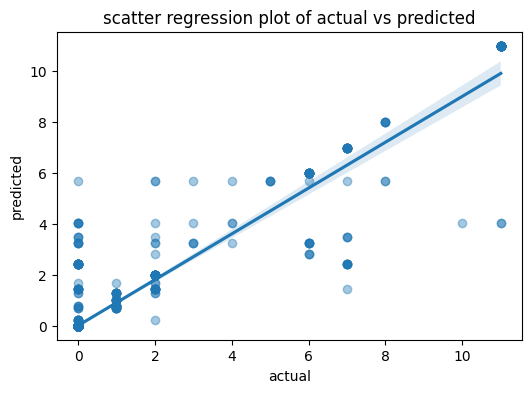

In [ ]:
# Plot real vs predicted values
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=rf_preds, data=df, scatter_kws={'alpha':0.4})
plt.title('scatter regression plot of actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Model Testing

In [ ]:
df[(df['Board'] == 1) & (df['Hour'] == 4) & (df['direction'] == 1) & (df['Min'] == 15)]['stop_cluster'].value_counts()

,count
stop_cluster,


In [ ]:
X = df[['Hour', 'Min', 'direction', 'Day_of_week', 'stop_cluster']]

In [ ]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, rf_model.predict([[i, j, 1, 1, 0]]))

4 0 1 [5.94]
4 1 1 [5.94]
4 2 1 [0.2551364]
4 3 1 [0.]
4 4 1 [0.]
4 5 1 [0.]
4 6 1 [0.]
4 7 1 [0.]
4 8 1 [0.]
4 9 1 [0.]
4 10 1 [0.]
4 11 1 [0.]
4 12 1 [0.]
4 13 1 [0.]
4 14 1 [0.]
4 15 1 [0.]
4 16 1 [0.]
4 17 1 [0.]
4 18 1 [0.]
4 19 1 [0.]
4 20 1 [0.]
4 21 1 [0.]
4 22 1 [0.]
4 23 1 [0.]
4 24 1 [0.]
4 25 1 [0.]
4 26 1 [0.]
4 27 1 [0.]
4 28 1 [0.]
4 29 1 [0.]
4 30 1 [0.]
4 31 1 [0.]
4 32 1 [0.]
4 33 1 [0.]
4 34 1 [0.]
4 35 1 [0.]
4 36 1 [0.]
4 37 1 [0.]
4 38 1 [0.]
4 39 1 [0.]
4 40 1 [0.]
4 41 1 [0.]
4 42 1 [0.]
4 43 1 [0.]
4 44 1 [0.]
4 45 1 [0.]
4 46 1 [0.]
4 47 1 [0.]
4 48 1 [0.]
4 49 1 [0.]
4 50 1 [0.]
4 51 1 [0.]
4 52 1 [0.]
4 53 1 [0.]
4 54 1 [0.]
4 55 1 [0.]
4 56 1 [0.]
4 57 1 [0.]
4 58 1 [0.]
4 59 1 [0.]
5 0 1 [5.94]
5 1 1 [5.94]
5 2 1 [0.2551364]
5 3 1 [0.]
5 4 1 [0.]
5 5 1 [0.]
5 6 1 [0.]
5 7 1 [0.]
5 8 1 [0.]
5 9 1 [0.]
5 10 1 [0.]
5 11 1 [0.]
5 12 1 [0.]
5 13 1 [0.]
5 14 1 [0.]
5 15 1 [0.]
5 16 1 [0.]
5 17 1 [0.]
5 18 1 [0.]
5 19 1 [0.]
5 20 1 [0.]
5 21 1 [0.]
5 22 1 [0.]
5 

In [ ]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, xg_model.predict([[i, j, 1, 1, 10]]))

4 0 1 [0.5356792]
4 1 1 [0.5358939]
4 2 1 [0.5366601]
4 3 1 [0.5193796]
4 4 1 [0.51886785]
4 5 1 [0.51886785]
4 6 1 [0.508883]
4 7 1 [0.5075498]
4 8 1 [0.5147137]
4 9 1 [0.5147137]
4 10 1 [0.40875277]
4 11 1 [0.40875277]
4 12 1 [0.40796664]
4 13 1 [0.5098065]
4 14 1 [0.5094983]
4 15 1 [0.5094983]
4 16 1 [0.5122629]
4 17 1 [0.5131296]
4 18 1 [0.5131296]
4 19 1 [0.51364046]
4 20 1 [0.51364046]
4 21 1 [0.51364046]
4 22 1 [0.50590056]
4 23 1 [0.50590056]
4 24 1 [0.11009039]
4 25 1 [0.7226036]
4 26 1 [0.6297955]
4 27 1 [0.68671644]
4 28 1 [0.69668967]
4 29 1 [0.8582666]
4 30 1 [0.7848078]
4 31 1 [0.7695035]
4 32 1 [1.1396378]
4 33 1 [0.54591066]
4 34 1 [-0.04948987]
4 35 1 [-0.03866452]
4 36 1 [-0.03091966]
4 37 1 [-0.02908542]
4 38 1 [-0.02825015]
4 39 1 [-0.02925751]
4 40 1 [-0.01760429]
4 41 1 [-0.01386812]
4 42 1 [0.02251188]
4 43 1 [0.00846848]
4 44 1 [-0.00627748]
4 45 1 [-0.00478945]
4 46 1 [0.01568951]
4 47 1 [1.1689701]
4 48 1 [0.37423185]
4 49 1 [0.8783565]
4 50 1 [0.96744347]
4 5